# 2) IACOV - Model Development for Prognosis - MV
## Strategy 4) Training on hospitals of other regions and testing on 30% of a specific hospital

In [1]:
# !pip install npm nodejs

In [2]:
# !jupyter lab clean
# !jupyter lab build

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

C:\Users\carin\AppData\Local\Temp\ipykernel_20872\2017038996.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### This code uses just 14 hospitals, since ICU or MV has no variation for 4 hospitals
#### - The code that prepares the data to run all strategies for ICU and MV is: PREPARING_DATA_TO_UCI_MV_ANALYSES
#### - df_iacov_en.csv (used for death) was replaced here by df_iacov_model_lean_14hosp.csv
#### - put df_iacov_model_lean_14hosp.csv in same folder as this notebook

In [4]:
#Put csv in same folder as this notebook
dataset = pd.read_csv("df_iacov_model_lean_14hosp.csv", delimiter=";")
df_iacov_model = pd.DataFrame(dataset)
df_iacov_model.shape

(6046, 30)

In [5]:
df_iacov_model.columns

Index(['city_hospital', 'age', 'male', 'race', 'heart_rate', 'resp_rate',
       'sys_press', 'dias_press', 'mean_press', 'temp', 'hemoglobin',
       'platelets', 'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv',
       'leukocytes', 'neutrophil', 'lymphocytes', 'basophils', 'eosinophils',
       'monocytes', 'crp', 'death', 'icu', 'mv', 'state', 'region', 'excluir'],
      dtype='object')

## 2.1) Assign binary outcome ICU to be predicted

### 2.1.1) Maintain essential variables (LEAN Model)

In [6]:
#22 predictors + outcome + Region/State
df_iacov_model_lean = df_iacov_model[['city_hospital'
                                      ,'age'
                                      ,'male'
                                      ,'heart_rate'
                                      ,'resp_rate'
                                      ,'sys_press'
                                      ,'dias_press'
                                      ,'mean_press'
                                      ,'temp'
                                      ,'hemoglobin'
                                      ,'platelets'
                                      ,'hematocrit'
                                      ,'red_cells_count'
                                      ,'hcm'
                                      ,'rdw'
                                      ,'mcv'
                                      ,'leukocytes'
                                      ,'neutrophil'
                                      ,'lymphocytes'
                                      ,'basophils'
                                      ,'eosinophils'
                                      ,'monocytes'
                                      ,'crp'
                                      ,'mv'
                                      ,'region' #for filtering purposes
                                      ,'state' #for filtering purposes
                                     ]]
df_iacov_model_lean.shape

(6046, 26)

In [7]:
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
HC_USP                        1500
HOSPPORTUGUES_SALVADOR        1359
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
AMAZONAS_HUGV                   47
Name: count, dtype: int64

In [8]:
df_iacov_model_lean.to_csv('df_iacov_model_lean.csv', sep=';', index=False)

### 2.1.2) Filter a specific hospital

In [9]:
#Put csv in same folder as this notebook
df_all_hospitals = pd.read_csv("df_iacov_model_lean.csv", delimiter=";", decimal=".")
df_all_hospitals.shape

(6046, 26)

In [10]:
df_all_hospitals.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'mv', 'region', 'state'],
      dtype='object')

In [11]:
df_all_hospitals.region.value_counts()

region
NORDESTE       2389
SUDESTE        2129
SUL             695
CENTROOESTE     539
NORTE           294
Name: count, dtype: int64

In [12]:
column_summaries(df_all_hospitals)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,14,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0,0.000,98,0,float64,-0.060,6046.000,57.521,17.869,18.000,44.000,58.000,71.000,105.000
male,0,0.000,2,2790,float64,-0.155,6046.000,0.539,0.499,0.000,0.000,1.000,1.000,1.000
heart_rate,809,13.381,183,0,float64,0.611,5237.000,85.689,17.209,13.000,75.000,85.000,96.000,233.000
resp_rate,1457,24.099,69,1,float64,2.897,4589.000,21.881,6.380,0.000,18.000,20.000,24.000,108.000
sys_press,1336,22.097,215,0,float64,-0.279,4710.000,124.054,22.791,10.000,110.000,122.000,138.000,242.000
dias_press,1325,21.915,150,0,float64,-0.361,4721.000,74.608,14.626,6.000,67.000,76.000,81.000,141.000
mean_press,1366,22.593,1452,326,float64,-1.751,4680.000,83.731,28.475,0.000,78.981,90.000,98.648,166.000
temp,1173,19.401,128,1,float64,62.972,4873.000,36.430,4.976,0.000,36.000,36.300,36.800,372.000
hemoglobin,1904,31.492,226,0,float64,-0.628,4142.000,12.752,2.189,1.400,11.692,13.000,14.200,30.600


In [13]:
import ipywidgets as widgets
from IPython.display import clear_output

In [14]:
df_all_hospitals.city_hospital.value_counts()

city_hospital
HC_USP                        1500
HOSPPORTUGUES_SALVADOR        1359
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
AMAZONAS_HUGV                   47
Name: count, dtype: int64

In [15]:
# Hospitals excluded for ICU and MV analyses: 'HOSPSANTACASASP_FULL', 'HOSPGRUPOSANTA', 'HUTRIN_2021_02', 'RIO_DE_JANEIRO_HUCFF'
dropdown_hospital = widgets.Dropdown(options = ['Choose a hospital ...'
                                                ,'HC_USP'                     #SP
                                                ,'HOSPPORTUGUES_SALVADOR'     #BA
                                                ,'CEARA_UNIMED'               #CE
                                                ,'HRL_2021_02'                #GO - Luiziania
                                                ,'HMV_POA_02'                 #RS - Moinhos de Vento
                                                ,'RIO_DE_JANEIRO_UNIMED'      #RJ
                                                ,'HOSPSANTAJULIA_MANAUS'      #AM
                                                ,'HOSPSANTACATARINABLUMENAU'  #SC
                                                ,'HOSPSAOFRANCISCO_MOGIGUACU' #SP
                                                ,'PERNAMBUCO_FULL'            #PE
                                                ,'PELOTAS'                    #RS
                                                ,'CEARA_HUWC'                 #CE
                                                ,'HEVV'                       #ES - Vila Velha
                                                ,'AMAZONAS_HUGV'              #AM
#                                                 ,'GHC_02'                     #RS 
                                               ])

In [16]:
specific_hospital = 'Choose a hospital'
df_iacov_model_lean = df_all_hospitals

def dropdown_hospital_eventhandler(change):
    global specific_hospital 
    specific_hospital = change.new
    dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

In [17]:
dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

**Select Hospital to train**

In [18]:
# !pip install ipywidgets

In [19]:
# !jupyter nbextension enable --py widgetsnbextension

In [20]:
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [25]:
display(dropdown_hospital)

Dropdown(index=1, options=('Choose a hospital ...', 'HC_USP', 'HOSPPORTUGUES_SALVADOR', 'CEARA_UNIMED', 'HRL_2…

**Filter all hospitals except the selected above**

In [26]:
df_all_hospitals.region.value_counts()

region
NORDESTE       2389
SUDESTE        2129
SUL             695
CENTROOESTE     539
NORTE           294
Name: count, dtype: int64

**Split train/test of specific Hospital**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
#Filter the specific hospital
df_iacov_model_lean_specific = df_all_hospitals[df_all_hospitals.city_hospital == specific_hospital]
df_iacov_model_lean_specific.shape

(1500, 26)

In [29]:
X_specific = df_iacov_model_lean_specific.drop(['mv'],axis=1)
X_specific.shape

(1500, 25)

In [30]:
y_specific = df_iacov_model_lean_specific['mv']
y_specific.shape

(1500,)

In [31]:
X_train_specific, X_test_specific, y_train_specific, y_test_specific = train_test_split(X_specific, y_specific, test_size=0.30, random_state=42, stratify=y_specific)

In [32]:
X_train_specific.shape

(1050, 25)

In [33]:
X_test_specific.shape

(450, 25)

**Filter all hospitals on regions different as specific** 

PS: Also removed GHC hospital due to very low positive cases

In [34]:
#Filter all hospitals from the "O T H E R" region of the left out hospital, except the left out hospital
df_iacov_model_lean = df_all_hospitals[ (df_all_hospitals.region != df_all_hospitals[df_all_hospitals.city_hospital==specific_hospital].region.iloc[0]) &
                                        (df_all_hospitals.city_hospital != specific_hospital) & (df_all_hospitals.city_hospital != 'GHC_02') ]

In [35]:
#check data without specific
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
HOSPPORTUGUES_SALVADOR       1359
CEARA_UNIMED                  845
HRL_2021_02                   539
HMV_POA_02                    456
HOSPSANTAJULIA_MANAUS         247
HOSPSANTACATARINABLUMENAU     148
PERNAMBUCO_FULL               112
PELOTAS                        91
CEARA_HUWC                     73
AMAZONAS_HUGV                  47
Name: count, dtype: int64

In [36]:
print("Specific: " + specific_hospital )
print("(training - other regions hospitals) dataset: " + str(df_iacov_model_lean.shape))

print("\n(training - specific) dataset: {}".format(X_train_specific.shape))

print("\n(test - specific) dataset: {}".format(X_test_specific.shape))

Specific: HC_USP
(training - other regions hospitals) dataset: (3917, 26)

(training - specific) dataset: (1050, 25)

(test - specific) dataset: (450, 25)


### 2.1.3) Dropping unused variables (All other region hospitals)

In [37]:
df_iacov_model_lean = df_iacov_model_lean.drop(['city_hospital'],axis=1)
df_iacov_model_lean.shape

(3917, 25)

In [38]:
#Preencho NAs com 0 
df_iacov_model_lean['mv'] = df_iacov_model_lean['mv'].fillna(0)
df_iacov_model_lean.mv.value_counts()

mv
0    3076
1     841
Name: count, dtype: int64

In [39]:
#Check proportion of deaths on training data 
(df_iacov_model_lean.mv.value_counts()/len(df_iacov_model_lean.mv))*100

mv
0   78.529
1   21.471
Name: count, dtype: float64

### From now on the outcome will call CLASS

In [40]:
df_iacov_model_lean['class'] = df_iacov_model_lean['mv'].astype('int')
df_iacov_model_lean = df_iacov_model_lean.drop(['mv'],axis=1)

### 2.1.4) Recalculating null mean_press

In [41]:
def isNullMeanPressure(row):

    if pd.isnull(row['mean_press']):
    
        if pd.notnull(row['sys_press']) and pd.notnull(row['dias_press']):
            return (row['sys_press']+row['dias_press'])/2
        else:
            return row['mean_press']
    else:
        return row['mean_press']

In [42]:
#Check mean_press missing before recalculating
column_summaries(df_iacov_model_lean)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,84,0,float64,0.064,3917.000,55.845,18.312,18.000,41.000,56.000,70.000,105.000
male,0,0.000,2,1857,float64,-0.104,3917.000,0.526,0.499,0.000,0.000,1.000,1.000,1.000
heart_rate,782,19.964,172,0,float64,0.703,3135.000,85.302,16.912,20.000,75.000,84.000,96.000,233.000
resp_rate,1365,34.848,59,1,float64,2.582,2552.000,20.766,5.659,0.000,18.000,20.000,22.000,95.000
sys_press,1295,33.061,206,0,float64,-0.222,2622.000,125.332,22.935,13.800,113.000,124.000,139.000,242.000
dias_press,1285,32.806,143,0,float64,-0.516,2632.000,75.497,14.797,10.000,70.000,78.500,81.000,141.000
mean_press,1175,29.997,608,326,float64,-1.419,2742.000,79.755,34.278,0.000,77.079,90.150,98.000,166.000
temp,1109,28.312,121,1,float64,48.948,2808.000,36.469,6.504,0.000,36.000,36.300,36.700,372.000
hemoglobin,584,14.909,219,0,float64,-0.538,3333.000,12.797,2.134,3.200,11.700,13.100,14.300,30.600
platelets,602,15.369,975,0,float64,0.207,3315.000,243412.884,161573.195,12.000,141000.000,224000.000,375650.000,826600.000


In [43]:
df_iacov_model_lean['mean_press'] = df_iacov_model_lean.apply(isNullMeanPressure, axis=1)

In [44]:
#Check mean_press missing after recalculating
#column_summaries(df_iacov_model_lean)

In [45]:
X_test_specific['mean_press'] = X_test_specific.apply(isNullMeanPressure, axis=1)

In [46]:
#column_summaries(X_test_specific)

### Put X_test and y_test in separate files

In [47]:
x_test_specific_name = 'X_test_other_regions_vs_one_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
x_test_specific_name

'X_test_other_regions_vs_one_SUDESTE_SP_HC_USP.csv'

In [48]:
y_test_specific_name = 'y_mv_other_regions_vs_one_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
y_test_specific_name

'y_mv_other_regions_vs_one_SUDESTE_SP_HC_USP.csv'

In [49]:
X_test_specific.to_csv(x_test_specific_name, sep=';')
X_test_specific.shape

(450, 25)

In [50]:
y_test_specific.to_csv(y_test_specific_name, sep=';')
y_test_specific.shape

(450,)

## 2.2) Prepare Experiment 

###  All hospitals on regions different of specific hospital 

In [51]:
df_iacov_model_lean.shape

(3917, 25)

In [52]:
df_iacov_model_train = df_iacov_model_lean

In [53]:
df_iacov_model_train = df_iacov_model_train.drop(['region'],axis=1)
df_iacov_model_train = df_iacov_model_train.drop(['state'],axis=1)
df_iacov_model_train.columns

Index(['age', 'male', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp', 'class'],
      dtype='object')

__Atention!__: If any Dtype is bool, cast to int32, otherwise experiment will fail

In [54]:
df_iacov_model_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3917 entries, 0 to 6045
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3917 non-null   float64
 1   male             3917 non-null   float64
 2   heart_rate       3135 non-null   float64
 3   resp_rate        2552 non-null   float64
 4   sys_press        2622 non-null   float64
 5   dias_press       2632 non-null   float64
 6   mean_press       2959 non-null   float64
 7   temp             2808 non-null   float64
 8   hemoglobin       3333 non-null   float64
 9   platelets        3315 non-null   float64
 10  hematocrit       3329 non-null   float64
 11  red_cells_count  2766 non-null   float64
 12  hcm              2883 non-null   float64
 13  rdw              2883 non-null   float64
 14  mcv              2889 non-null   float64
 15  leukocytes       3318 non-null   float64
 16  neutrophil       2106 non-null   float64
 17  lymphocytes      26

In [55]:
exp = setup(df_iacov_model_train
            , target='class'
            , categorical_features = ['male']
            , numeric_features = ['crp','basophils','eosinophils','red_cells_count','monocytes','hemoglobin','resp_rate','neutrophil','hematocrit']
            , normalize=True
            #, remove_multicollinearity=True
            ,numeric_imputation='median'
#             ,numeric_imputation='ignore'
            #,multicollinearity_threshold=0.9
            , resample=True
            , resample_method='random_over'
#             , train_size = 1.0 #100pct for training
           )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(3917, 23)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [58]:
X, y, X_train, X_test, y_train, y_test, seed, prep_pipe, _ = exp

In [59]:
X_train.shape

(4304, 22)

In [60]:
X_test.shape

(1176, 22)

In [61]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [62]:
seed

42

In [63]:
# Xtrain.head()

### Filtering only 5 pre-selected models

In [64]:
# print(inspect.getsource(compare_models))

In [65]:
#Modelos que suportam missing (1) - Modelos pre-selecionados(2)
compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","et","mlp","rf"] , turbo = False)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.932800,0.981000,0.987000,0.878700,0.890800,0.936400,0.865700,0.000800,0.281300,0.791900
1,Light Gradient Boosting Machine,0.924700,0.975900,0.978600,0.870800,0.883600,0.928600,0.849400,0.024000,0.145500,0.763000
2,CatBoost Classifier,0.901500,0.963300,0.953100,0.849900,0.864200,0.906400,0.803000,0.041100,0.014700,0.700400


### Tune selected models by AUC (and hyperopt bayesian optimization) to use on test data

In [66]:
cattuned = tune_model('catboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.958,0.993,0.986,0.931,0.934,0.959,0.916,0.000,0.114,0.859
1,0.940,0.996,0.986,0.893,0.902,0.942,0.879,0.000,0.001,0.826
2,0.933,0.995,0.982,0.884,0.894,0.936,0.865,0.000,0.019,0.820
3,0.956,0.999,0.995,0.916,0.923,0.958,0.912,0.000,0.534,0.864
4,0.930,0.993,0.981,0.879,0.890,0.934,0.861,0.000,0.011,0.815
5,0.935,0.992,0.977,0.893,0.901,0.938,0.870,0.000,0.014,0.823
6,0.930,0.991,0.977,0.884,0.894,0.933,0.861,0.000,0.005,0.791
7,0.956,0.997,0.991,0.921,0.926,0.957,0.912,0.000,0.382,0.859
8,0.956,0.995,0.991,0.921,0.926,0.957,0.912,0.000,0.593,0.849
9,0.937,0.993,0.981,0.893,0.902,0.940,0.874,0.000,0.015,0.828


In [67]:
lgbmtuned = tune_model('lightgbm', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.947,0.996,0.991,0.903,0.910,0.949,0.893,0.000,0.000,0.835
1,0.933,0.991,0.991,0.875,0.887,0.936,0.866,0.000,0.000,0.775
2,0.914,0.986,0.991,0.837,0.859,0.920,0.828,0.000,0.000,0.732
3,0.947,1.000,0.995,0.898,0.907,0.949,0.893,0.000,0.000,0.831
4,0.928,0.994,0.981,0.874,0.887,0.932,0.856,0.000,0.000,0.761
5,0.921,0.990,0.986,0.856,0.872,0.926,0.842,0.000,0.000,0.744
6,0.923,0.989,0.991,0.856,0.873,0.928,0.847,0.000,0.000,0.760
7,0.930,0.993,0.991,0.870,0.884,0.934,0.861,0.000,0.000,0.779
8,0.933,0.988,0.981,0.884,0.894,0.936,0.865,0.000,0.000,0.787
9,0.935,0.994,0.986,0.884,0.894,0.938,0.870,0.000,0.000,0.803


In [68]:
xgbtuned = tune_model('xgboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.933,0.982,0.967,0.898,0.904,0.935,0.866,0.128,0.213,0.788
1,0.921,0.973,0.986,0.857,0.872,0.926,0.842,0.000,0.677,0.759
2,0.898,0.963,0.958,0.837,0.855,0.904,0.796,0.173,0.541,0.706
3,0.937,0.983,0.995,0.879,0.892,0.941,0.875,0.002,0.028,0.795
4,0.926,0.976,0.977,0.874,0.886,0.929,0.851,0.028,0.453,0.758
5,0.914,0.961,0.967,0.861,0.874,0.918,0.828,0.000,0.952,0.725
6,0.907,0.971,0.981,0.833,0.854,0.913,0.814,0.002,0.446,0.744
7,0.930,0.975,0.981,0.879,0.890,0.934,0.861,0.095,0.187,0.761
8,0.916,0.972,0.967,0.865,0.878,0.920,0.833,0.004,0.123,0.758
9,0.916,0.977,0.972,0.861,0.875,0.921,0.833,0.003,0.350,0.763


### Select best algorithm based on AUC in predicts

In [69]:
preds_cat = predict_model(cattuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,CatBoost Classifier,0.806,0.838,0.512,0.886,0.551,0.531,0.409,0.000,0.000,0.150


In [70]:
preds_lgb = predict_model(lgbmtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.803,0.838,0.556,0.870,0.538,0.547,0.421,0.000,0.000,0.056


In [71]:
preds_xgb = predict_model(xgbtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.799,0.833,0.587,0.857,0.529,0.556,0.427,0.000,0.000,0.158


In [82]:
# Put in PREDS the best algorithm chosen in the previous lines: preds_cat OR preds_lgb OR preds_xgb
preds = preds_cat
#preds = preds_lgb
#preds = preds_xgb

### Best model

In [83]:
npv(y_test, preds['Label'])

0.8694267515923567

In [84]:
#ROC AUC (INTERVALO)
["{0:0.2f}".format(i) for i in AUC_CI(y_test, preds['Score'].values)]

['0.81', '0.86']

,,
,,
Ground Truth Prevalence,. . .,0.214
Test set Prevalence,. . .,0.199
True positive rate (recall),. . .,0.512
False positive rate,. . .,0.114
Positive predictive value (precision),. . .,0.551
True negative rate (specificity),. . .,0.886
False negative rate,. . .,0.488
Negative predictive value,. . .,0.869
Positive likelihood ratio (bigger is better),. . .,4.505


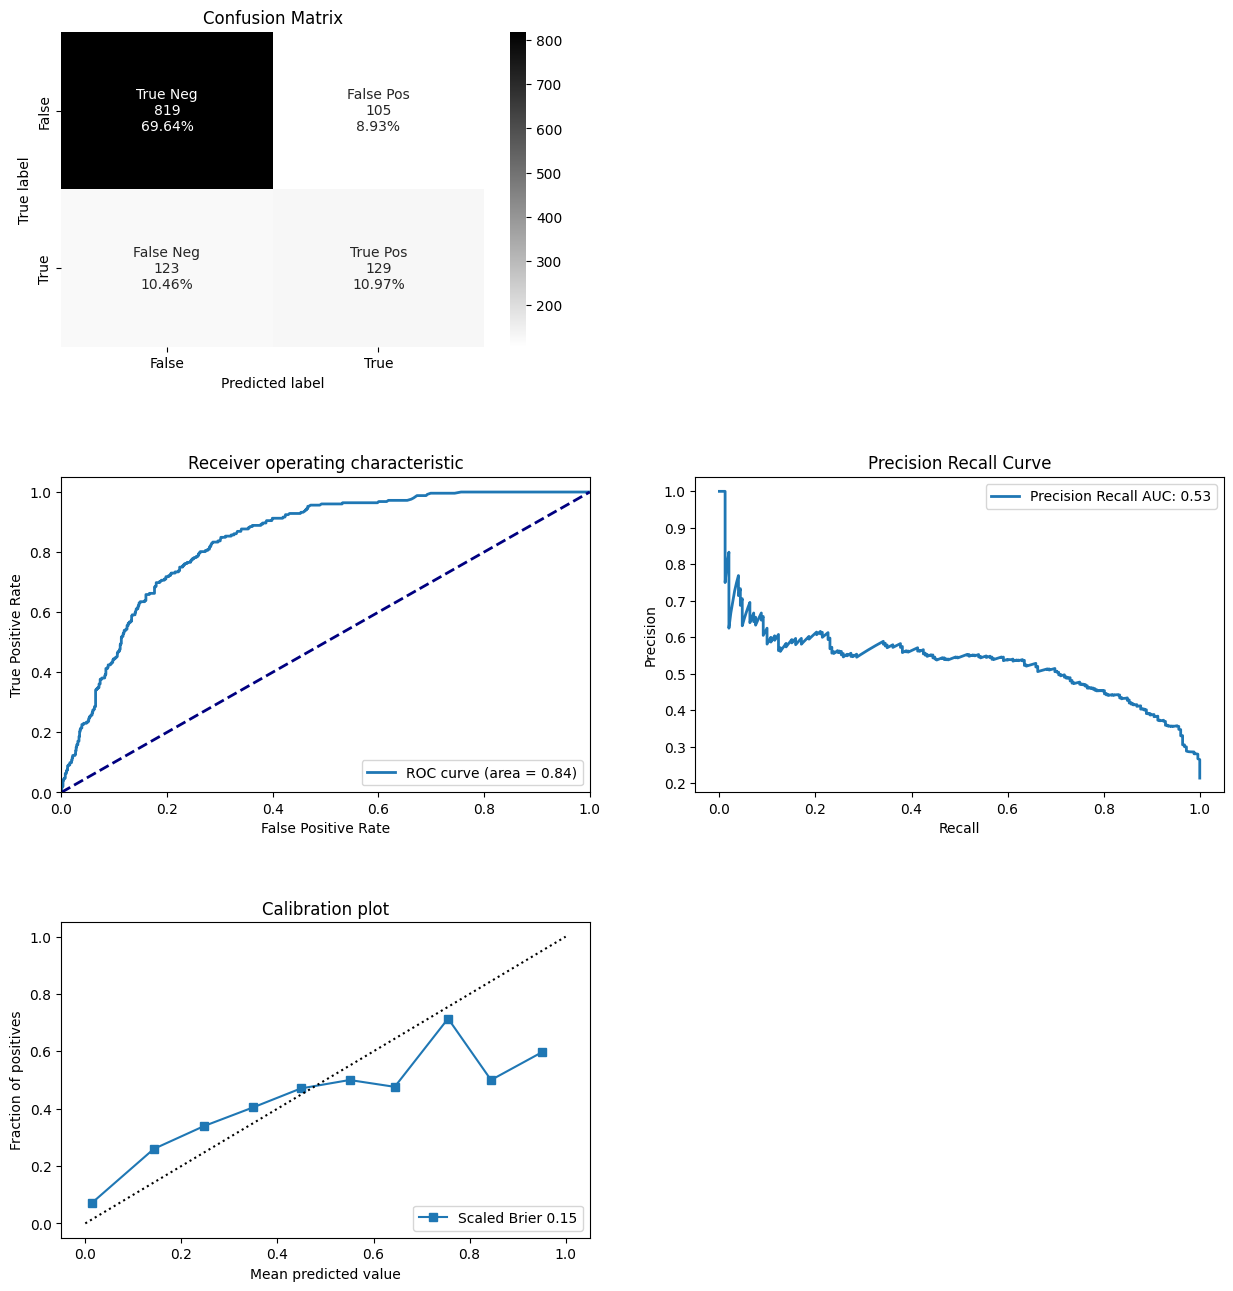

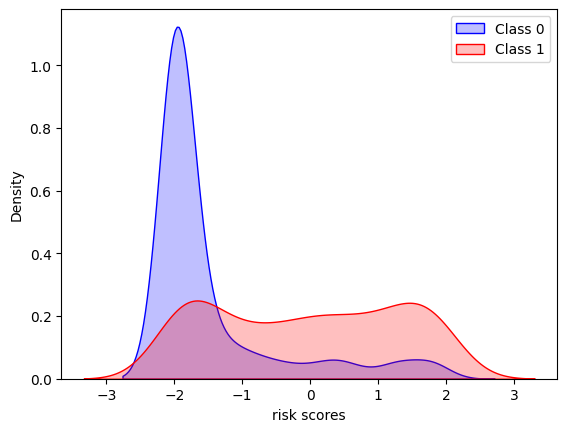

,,
,,
Ground Truth Prevalence,. . .,0.214
Test set Prevalence,. . .,0.199
True positive rate (recall),. . .,0.512
False positive rate,. . .,0.114
Positive predictive value (precision),. . .,0.551
True negative rate (specificity),. . .,0.886
False negative rate,. . .,0.488
Negative predictive value,. . .,0.869
Positive likelihood ratio (bigger is better),. . .,4.505


In [85]:
import MLFlow_Utils
binary_classification_metrics(y_test, preds["Label"], preds["Score"])

### Understand best algorithm features and results
#### Run INTERPRETE_MODEL only for the best algorithm chosen in the previous lines

In [86]:
#evaluate_model(cattuned)

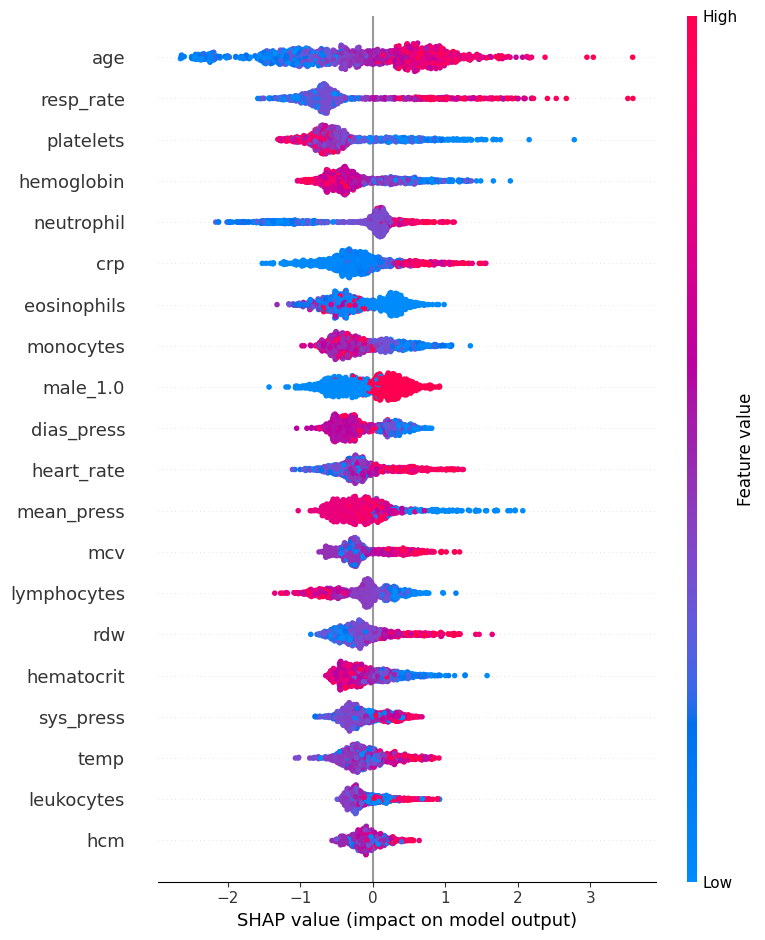

In [87]:
interpret_model(cattuned)
#interpret_model(lgbmtuned)
#interpret_model(xgbtuned)

In [88]:
#plot_model(cattuned, plot='ktops')

### 2.3.1) Build a model with all data
#### Run FINALIZE MODEL only for the best algorithm chosen in the previous lines

In [89]:
final_model = finalize_model(cattuned)
#final_model = finalize_model(lgbmtuned)
#final_model = finalize_model(xgbtuned)

In [90]:
str(final_model.__class__.__name__)

'CatBoostClassifier'

In [91]:
final_model_name = str(final_model.__class__.__name__) + '_other_regions_vs_one_' \
                    + X_test_specific.region.iloc[0]  \
                    + '_' + X_test_specific.state.iloc[0]  \
                    + '_' + X_test_specific.city_hospital.iloc[0]
final_model_name

'CatBoostClassifier_other_regions_vs_one_SUDESTE_SP_HC_USP'

In [92]:
save_model(final_model, final_model_name ,verbose=True)

Transformation Pipeline and Model Succesfully Saved


In [93]:
final_model
#final_model.get_all_params()

# Use the saved model to predict on specific hospital
## OTHER_REGION_VS_ONE

In [94]:
import pickle
import joblib

#Carrego o modelo unico
print('loaded: ' + final_model_name)

other_regions_vs_one_model_pkl = final_model_name + ".pkl"
prep_pipe_other_regions_vs_one, other_regions_vs_one_model = joblib.load(other_regions_vs_one_model_pkl)


# AS DUAS LINHAS ABAIXO ESTAVAM COM O NOME DA ESTRATÉGIA 2 
#all_except_one_model_pkl = final_model_name + ".pkl"
#prep_pipe_all_except_one, all_except_one_model = joblib.load(all_except_one_model_pkl)

loaded: CatBoostClassifier_other_regions_vs_one_SUDESTE_SP_HC_USP


In [95]:
other_regions_vs_one_model.__class__.__name__

'CatBoostClassifier'

In [96]:
x_test_specific_name

'X_test_other_regions_vs_one_SUDESTE_SP_HC_USP.csv'

In [97]:
#Carrego o X_test do modelo único
X_test_single = pd.read_csv(x_test_specific_name, delimiter=";",index_col=0)
X_test_single.shape

(450, 25)

In [98]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state'],
      dtype='object')

In [99]:
# X_train.columns

In [100]:
#Carrego o Y_test do modelo único
y_test_single = pd.read_csv(y_test_specific_name, delimiter=";",index_col=0)
y_test_single = y_test_single["mv"]
y_test_single.shape

(450,)

In [101]:
pd.set_option('display.max_columns', None)
X_test_single.head()

,city_hospital,age,male,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,red_cells_count,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,region,state
2194,HC_USP,79.000,0.000,90.000,22.000,130.000,90.000,103.320,36.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUDESTE,SP
2176,HC_USP,34.000,1.000,88.000,24.000,120.000,80.000,93.320,36.200,NaN,507000.000,NaN,NaN,25.300,15.500,78.900,4800.000,2490.000,900.000,0.020,NaN,0.420,1.181,SUDESTE,SP
1685,HC_USP,78.000,1.000,92.000,18.000,130.000,80.000,96.650,37.800,NaN,434000.000,NaN,NaN,27.500,16.000,84.600,7800.000,5830.000,1280.000,0.010,NaN,0.610,NaN,SUDESTE,SP
1257,HC_USP,82.000,0.000,61.000,13.000,80.000,40.000,53.320,35.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUDESTE,SP
1787,HC_USP,61.000,1.000,63.000,23.000,117.000,72.000,86.985,36.100,NaN,NaN,NaN,NaN,29.900,13.900,88.600,3370.000,2120.000,940.000,0.000,NaN,0.310,NaN,SUDESTE,SP


In [102]:
X_test_single["class"] = y_test_single

In [103]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state', 'class'],
      dtype='object')

In [104]:
X_test_single = X_test_single.drop(['city_hospital'],axis=1)
X_test_single = X_test_single.drop(['region'],axis=1)
X_test_single = X_test_single.drop(['state'],axis=1)

In [105]:
X_test_single_transformed = prep_pipe_other_regions_vs_one.fit_transform(X_test_single)
X_test_single_transformed.head()

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
age,Numeric
male,Categorical
heart_rate,Numeric
resp_rate,Numeric
sys_press,Numeric
dias_press,Numeric
mean_press,Numeric
temp,Numeric
hemoglobin,Numeric
platelets,Numeric


,class,age,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,monocytes,crp,male_1.0
2194,0,1.295,0.192,-0.257,0.506,1.328,1.078,0.242,-0.014,-0.199,0.016,0.073,-0.241,0.004,-0.146,-0.149,-0.243,-0.397,-0.221,-0.241,0.000
2176,0,-1.566,0.085,-0.008,0.055,0.649,0.436,-0.215,-0.014,2.556,0.016,-1.616,0.596,-1.168,-0.947,-1.179,-0.083,0.029,-0.189,-0.203,1.000
1685,0,1.232,0.300,-0.755,0.506,0.649,0.649,1.612,-0.014,1.876,0.016,-0.612,0.829,-0.186,-0.333,-0.451,0.590,-0.397,0.437,-0.241,1.000
1257,0,1.486,-1.371,-1.378,-1.749,-2.066,-2.132,-1.586,-0.014,-0.199,0.016,0.073,-0.241,0.004,-0.146,-0.149,-0.243,-0.397,-0.221,-0.241,0.000
1787,1,0.151,-1.263,-0.133,-0.080,0.106,0.029,-0.329,-0.014,-0.199,0.016,0.484,-0.148,0.503,-1.240,-1.259,-0.013,-0.824,-0.551,-0.241,1.000


In [106]:
X_test_single_transformed = X_test_single_transformed.drop(['class'],axis=1)

In [107]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [108]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit', 'hcm',
       'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes', 'basophils',
       'monocytes', 'crp', 'male_1.0'],
      dtype='object')

In [109]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [110]:
#Show distinct columns
distinct_columns = X_test[X_test.columns.difference(X_test_single_transformed.columns)].columns.tolist()
distinct_columns

['eosinophils', 'red_cells_count']

In [111]:
X_test_single_transformed.shape

(450, 20)

In [112]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit', 'hcm',
       'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes', 'basophils',
       'monocytes', 'crp', 'male_1.0'],
      dtype='object')

### Add missing columns to some hospitals that didn't collect all columns
e.g. HC_USP (missing: red_cells_count and eosinophils)

In [113]:
for column in distinct_columns:
    if(column=='male_0.0'):
        X_test_single_transformed['male_0.0'] = X_test_single_transformed['male_1.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_1.0', axis=1)
    else:
        X_test_single_transformed[column]=np.NaN

In [114]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit', 'hcm',
       'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes', 'basophils',
       'monocytes', 'crp', 'male_1.0', 'eosinophils', 'red_cells_count'],
      dtype='object')

In [115]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

**Reorder Columns**

In [116]:
# Reorder columns
X_test_single_transformed = X_test_single_transformed[X_test.columns]
X_test_single_transformed.shape

(450, 22)

In [117]:
X_test_other_regions_vs_one_name = 'X_test_other_regions_vs_one_transformed_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
X_test_other_regions_vs_one_name

'X_test_other_regions_vs_one_transformed_SUDESTE_SP_HC_USP.csv'

In [118]:
X_test_single_transformed.to_csv(X_test_other_regions_vs_one_name, sep=';')

0.6383310977196741


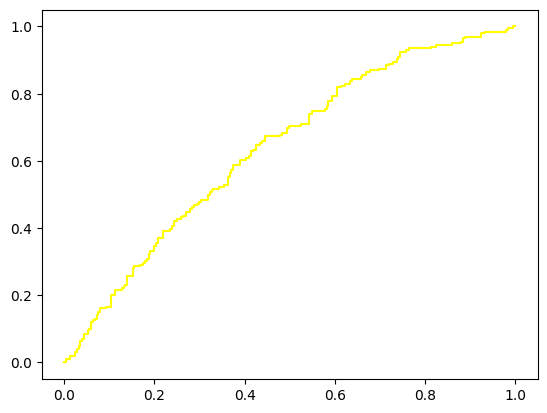

In [119]:
#Vejo a curva ROC do modelo INDIVIDUAL e confirmo o valor da AUC
from sklearn.metrics import (roc_curve,auc)

y_pred_prob1 = other_regions_vs_one_model.predict_proba(X_test_single_transformed)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test_single, y_pred_prob1)

auc_ind = auc(fpr1, tpr1)
print(auc_ind)
plt.plot(fpr1, tpr1, label= "Single Model - best model- AUC " +  str(auc_ind), color="yellow")

In [120]:
y_pred = other_regions_vs_one_model.predict(X_test_single_transformed)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [121]:
y_test_single.value_counts()

mv
0    251
1    199
Name: count, dtype: int64

In [122]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

,,
,,
Ground Truth Prevalence,. . .,0.442
Test set Prevalence,. . .,0.202
True positive rate (recall),. . .,0.266
False positive rate,. . .,0.151
Positive predictive value (precision),. . .,0.582
True negative rate (specificity),. . .,0.849
False negative rate,. . .,0.734
Negative predictive value,. . .,0.593
Positive likelihood ratio (bigger is better),. . .,1.759


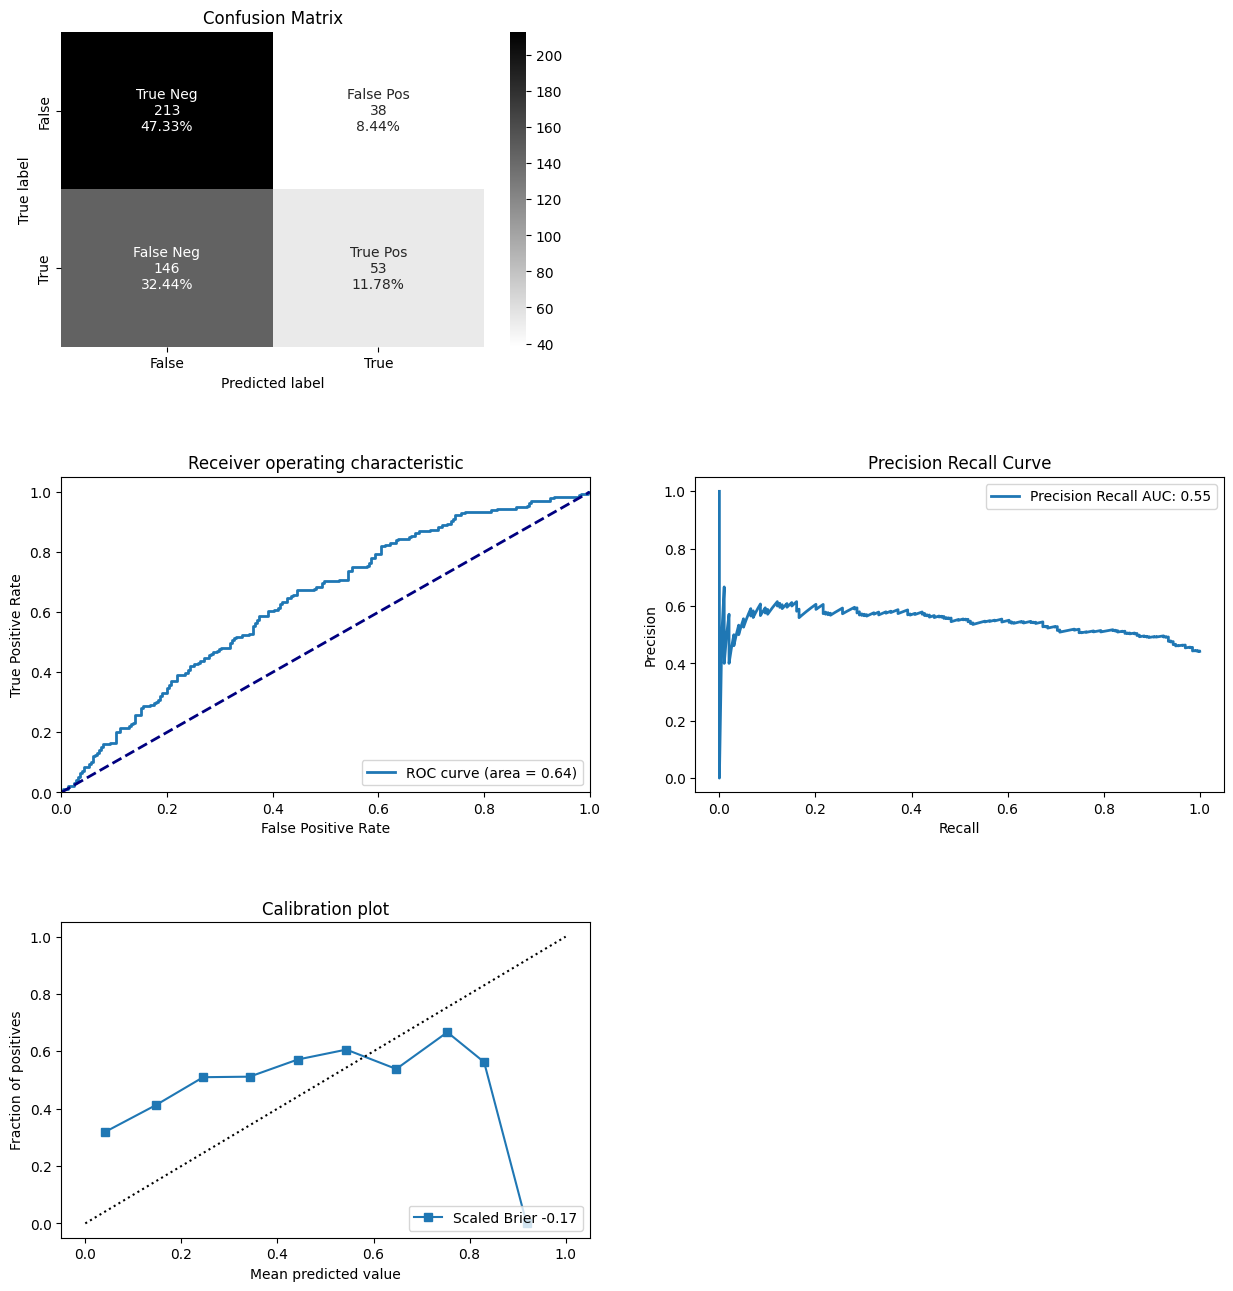

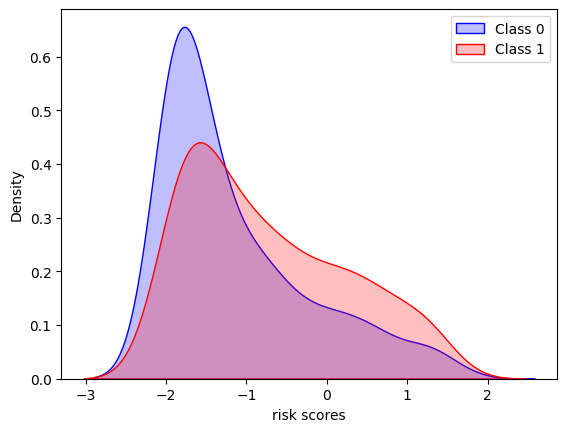

,,
,,
Ground Truth Prevalence,. . .,0.442
Test set Prevalence,. . .,0.202
True positive rate (recall),. . .,0.266
False positive rate,. . .,0.151
Positive predictive value (precision),. . .,0.582
True negative rate (specificity),. . .,0.849
False negative rate,. . .,0.734
Negative predictive value,. . .,0.593
Positive likelihood ratio (bigger is better),. . .,1.759


In [123]:
import MLFlow_Utils
binary_classification_metrics(y_test_single, y_pred, pd.Series(y_pred_prob1))

In [124]:
fprate, tprate, thresholds = roc_curve(y_test_single, y_pred_prob1, pos_label=1)
auc(fprate, tprate)

0.6383310977196741

In [125]:
#ROC_AUC
["{0:0.2f}".format(i) for i in AUC_CI(y_test_single, y_pred_prob1)]

['0.59', '0.69']

In [126]:
# y_test_single

In [127]:
#recall
tpr(y_test_single, y_pred)

0.2663316582914573

In [128]:
# pd.Series(y_pred)

In [129]:
#specificidade
tnr(y_test_single, pd.Series(y_pred))

0.848605577689243

In [130]:
#accuracy
accuracy(y_test_single, y_pred)

0.5911111111111111

In [131]:
ppv(y_test_single, y_pred)

0.5824175824175825

In [132]:
npv(y_test_single, y_pred)

0.5933147632311978

# End of File